# Natural Langauge Processing: Sentiment Analysis

----

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from re import sub
from sklearn.model_selection import train_test_split

# Getting the stopwords dataset from the NLTK Corpus
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
ignored_words = set(stopwords.words('English'))
ignored_words.remove('not')

# Transforms strings into numerical tokens.
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

[nltk_data] Downloading package stopwords to C:\Users\Dinesh
[nltk_data]     Balakrishnan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


----

### Preprocessing

In [2]:
# Getting the dataset and creating X,y
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)
X = []
y = dataset['Liked']

# Preprocessing the reviews.
for review in dataset.index:
    review = dataset['Review'][review].lower()
    review = sub('[^a-z]', ' ', review)

    review = review.split()
    review = [word for word in review if not word in ignored_words]
    review = ' '.join(review)
    
    X.append(review)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)

----

### Text Tokenization

In [3]:
max_words = 500
oov_token = '<OOV>'
padding_type = 'post'
trunc_type = 'post'
max_len = 10
embedding_dim = 8

# Creating the Word Index
tokenizer = Tokenizer(num_words = max_words, oov_token = oov_token)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

# Converting X_train and X_test to vectors.
X_train, X_test = tokenizer.texts_to_sequences(X_train), tokenizer.texts_to_sequences(X_test)
X_train = pad_sequences(X_train, padding = padding_type, truncating = trunc_type, maxlen = max_len)
X_test = pad_sequences(X_test, padding = padding_type, truncating = trunc_type, maxlen = max_len)

# Converting y_train and y_test to vectors.
y_train, y_test = np.expand_dims(y_train, axis = 1), np.expand_dims(y_test, axis = 1)

----

## Example Models

### Long Short-Term Memory (LSTM) Model

**LSTM()** is a variation of the RNN that maintains cell state. While the standard RNN model generates a hidden state to affect the next input value when training, the **LSTM()** is modified to remember multiple hidden states from previous nodes so that multiple previous hidden layers may influence the next input value. Additionally, the **Bidirectional()** wrapper ensures that cell state travels in both directions by training two individual LSTMS that transfer cell state in-order or in reverse-order.

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding((len(word_index) + 1), embedding_dim, input_length = max_len),
    # Must specify return_sequences = True if passing output to another RNN
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16, return_sequences = True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(8)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

### Convolutional Model

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding((len(word_index) + 1), embedding_dim, input_length = max_len),
    tf.keras.layers.Conv1D(16, 5, activation = 'relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

### LSTM & Convoluational Combination

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding((len(word_index) + 1), embedding_dim, input_length = max_len),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

----

### Viewing Model Details

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 10, 8)             13696     
_________________________________________________________________
conv1d (Conv1D)              (None, 6, 128)            5248      
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 516       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 19,465
Trainable params: 19,465
Non-trainable params: 0
_________________________________________________________________


----

### Training the Neural Network & Testing

In [7]:
results =  model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 15, verbose = 2)

Train on 850 samples, validate on 150 samples
Epoch 1/15
850/850 - 2s - loss: 0.6925 - accuracy: 0.4976 - val_loss: 0.6889 - val_accuracy: 0.5133
Epoch 2/15
850/850 - 0s - loss: 0.6846 - accuracy: 0.5518 - val_loss: 0.6792 - val_accuracy: 0.5267
Epoch 3/15
850/850 - 0s - loss: 0.6586 - accuracy: 0.6506 - val_loss: 0.6517 - val_accuracy: 0.6533
Epoch 4/15
850/850 - 0s - loss: 0.5978 - accuracy: 0.7306 - val_loss: 0.6198 - val_accuracy: 0.6800
Epoch 5/15
850/850 - 0s - loss: 0.5241 - accuracy: 0.8282 - val_loss: 0.6135 - val_accuracy: 0.7133
Epoch 6/15
850/850 - 0s - loss: 0.4715 - accuracy: 0.8882 - val_loss: 0.6220 - val_accuracy: 0.7200
Epoch 7/15
850/850 - 0s - loss: 0.4320 - accuracy: 0.9165 - val_loss: 0.6452 - val_accuracy: 0.7267
Epoch 8/15
850/850 - 0s - loss: 0.4003 - accuracy: 0.9365 - val_loss: 0.6688 - val_accuracy: 0.7000
Epoch 9/15
850/850 - 0s - loss: 0.3785 - accuracy: 0.9447 - val_loss: 0.6968 - val_accuracy: 0.6933
Epoch 10/15
850/850 - 0s - loss: 0.3576 - accuracy: 0.

----

### Graphing Accuracy & Loss

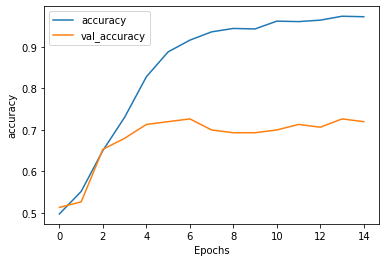

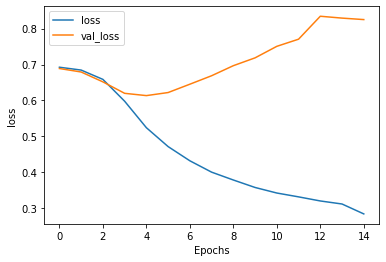

In [8]:
def plot_graphs(history, string):
    plt.plot(history[string])
    plt.plot(history['val_' + string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_' + string])
    plt.show()

plot_graphs(results.history, "accuracy")
plot_graphs(results.history, "loss")